# Supervised Machine Learning with KNN and Decision trees

## Question 1:
Compare and contrast k-NN and decision tree algorithms.

## Answer 1:

#### Classification approach:
k-NN is a lazy learning algorithm. It does not learn a model from the training data. Instead, it stores the entire training dataset and classifies new instances by comparing them to the k nearest training instances (i.e., the k nearest neighbors) based on a distance metric (e.g., Euclidean distance).
Decision Tree is an eager learning algorithm. It learns a model from the training data in advance. It creates a tree-like model of decisions and their possible consequences. This model is used to classify new instances by following a series of decision rules from the root to the leaf node.


#### Model interpretability:
k-NN is relatively easy to interpret, as it simply classifies new instances based on the nearest neighbors in the training dataset. However, the selection of k and the distance metric can impact the classification results and may 
Decision Tree is also easy to interpret, as the decision rules are explicitly represented in the form of a tree. It can also provide insights into the most important features for classification by analyzing the tree structure.

#### Scalability:
K-NN can be computationally expensive for large datasets because it requires distance calculations between the new data point and all the training data points. 
Decision trees can be optimized for large datasets and are computationally efficient.
#### Training time:
The k-NN algorithm has no training phase since it stores all the training data, and therefore, its prediction time is relatively slower than decision trees. Decision tree algorithms require training, which can take longer depending on the size of the training data.

## Question 2:

Apply k-NN algorithm for given dataset "task_dataset.csv" using different k values(k = 1, 2, 3, 5, 7, 11) and plot the "error vs k" and "accuracy vs k" plots. 
Choose most suitable k value for this dataset. Briefly explain why?

## Answer 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()

df = pd.read_csv('/Users/uddeepawijerathna/Documents/MSc/1st_sem/data_science/classification/task_dataset.csv')
df = df[['x1', 'x2', 'y']]

print(df.to_string()) 

           x1         x2    y
0   -1.682231   7.810350  0.0
1   -7.200878   9.754777  0.0
2   -6.473791  10.441019  0.0
3   -5.981745   8.025655  0.0
4   -4.521350   9.109850  0.0
5   -3.942308   9.067026  0.0
6   -3.508628   9.372828  0.0
7   -6.260588   9.487323  0.0
8   -3.485609   9.652824  0.0
9   -4.828767   7.383063  0.0
10  -7.051751  12.136805  0.0
11  -5.010846   7.851870  0.0
12  -4.816816  10.191561  0.0
13  -5.561898  11.145337  0.0
14  -4.385913   8.769194  0.0
15  -6.188323   7.617955  0.0
16  -3.199806   9.217878  0.0
17  -6.592169   9.171753  0.0
18  -8.054050   8.212053  0.0
19  -3.248632   6.436735  0.0
20  -4.392050   7.781093  0.0
21  -5.348805   8.335102  0.0
22  -8.274316   8.264019  0.0
23  -3.045186   8.512131  0.0
24  -1.308000   9.167858  0.0
25  -3.175918   7.335188  0.0
26  -3.771872   7.252243  0.0
27  -4.916602   9.653648  0.0
28  -2.773238   9.597526  0.0
29  -5.344913   7.954142  0.0
30  -3.412382   8.231713  0.0
31  -5.418049   9.227576  0.0
32  -2.646

In [2]:
X = df[['x1', 'x2']]
Y = df[['y']]

In [3]:
X.head()

,x1,x2
0,-1.682231,7.810350
1,-7.200878,9.754777
2,-6.473791,10.441019
3,-5.981745,8.025655
4,-4.521350,9.109850


In [4]:
Y.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [5]:
# Split the dataset into training and testing sets
#X = df.iloc[:, :-1].values
X = df[['x1', 'x2']].values
#Y = df.iloc[:, -1].values
T = df[['y']].values
X_train, X_test, y_train, y_test= train_test_split(X, Y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [6]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train) #the scaler is fitted to the training set and then transformed
X_test = scaler.transform(X_test)       #the scaler is applied to the test set

In [7]:
# Define the range of k values to test
k_values = [1, 2, 3, 5, 7, 11]

# Define arrays to store accuracy for each k value
accuracies = []

## without cross validation

In [8]:
from sklearn.metrics import accuracy_score

# Loop over each k value and train the k-NN model
for k in k_values:
    
    # Instantiate learning model
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fitting the model
    knn_classifier.fit(X_train, y_train.values.ravel())

    # Predicting the Test set results
    y_pred = knn_classifier.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test.values.ravel(), y_pred)*100
    
    # Store the error and accuracy for this k value
    accuracies.append(accuracy)


/Users/uddeepawijerathna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/uddeepawijerathna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

<Figure size 640x480 with 0 Axes>

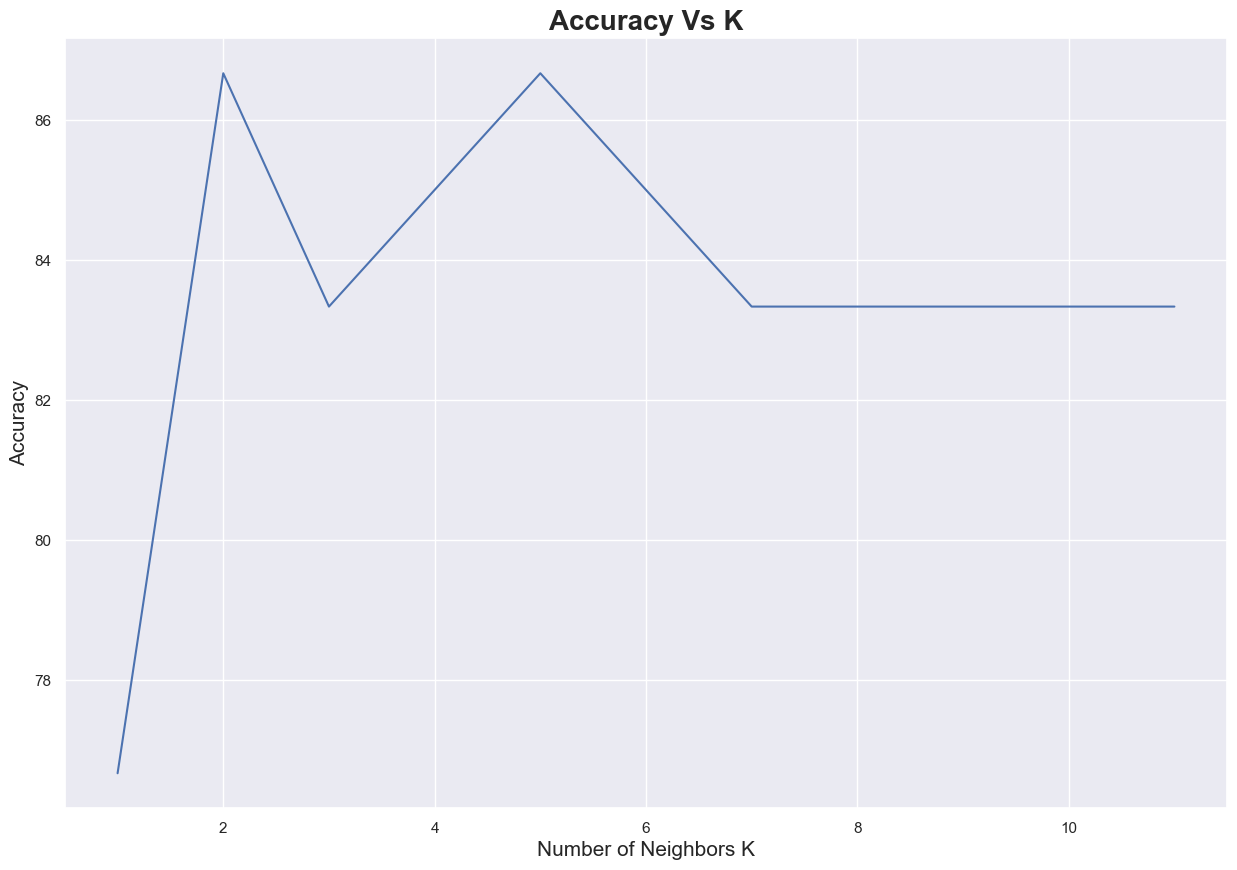

In [9]:
# Plot the error and accuracy vs k
plt.figure()
plt.figure(figsize=(15,10))
plt.title('Accuracy Vs K', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, accuracies)
plt.show()

## with cross validation

In [10]:
from sklearn.model_selection import cross_val_score

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/Users/uddeepawijerathna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/uddeepawijerathna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/uddeepawijerathna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-

<Figure size 640x480 with 0 Axes>

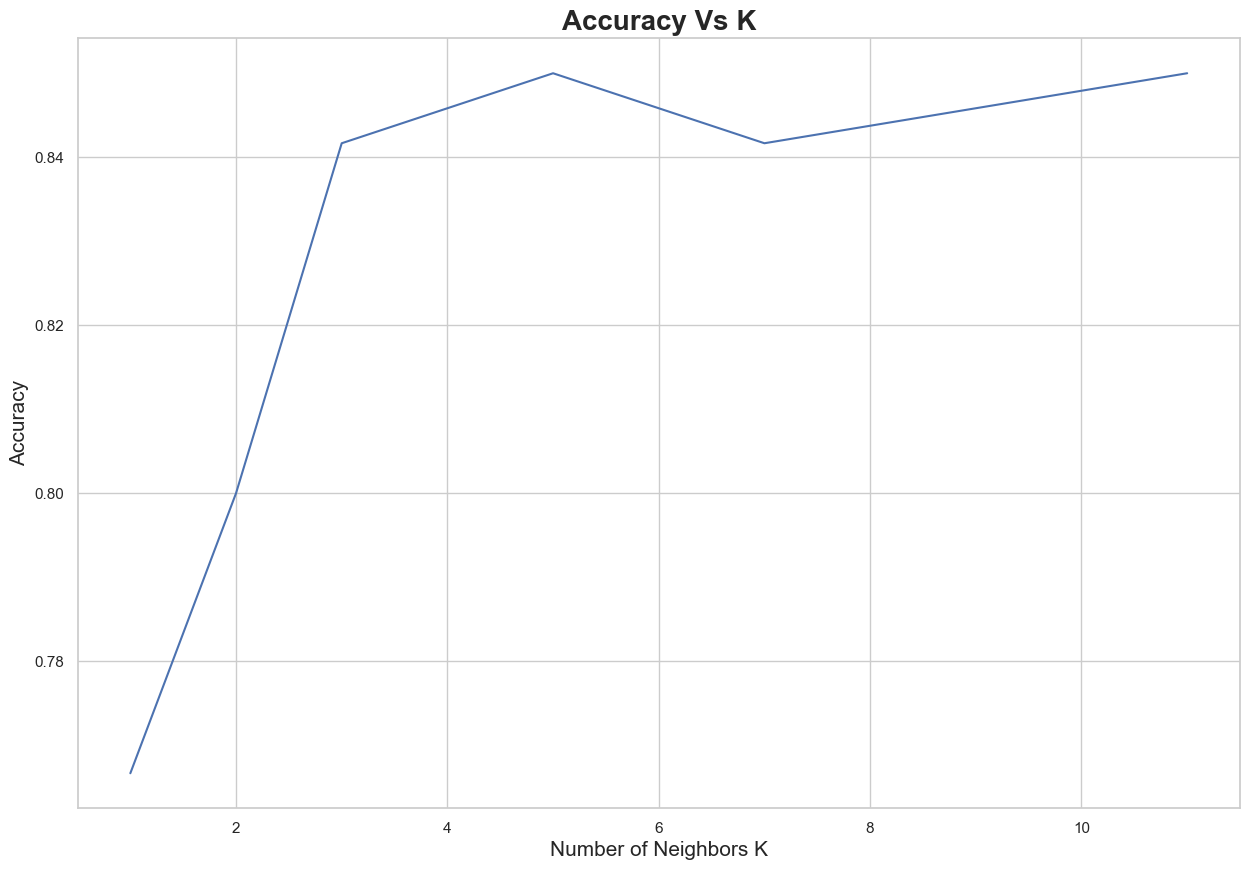

In [11]:
# changing to accuracy
Accuracy = [x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Accuracy Vs K', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, Accuracy)

plt.show()

<Figure size 640x480 with 0 Axes>

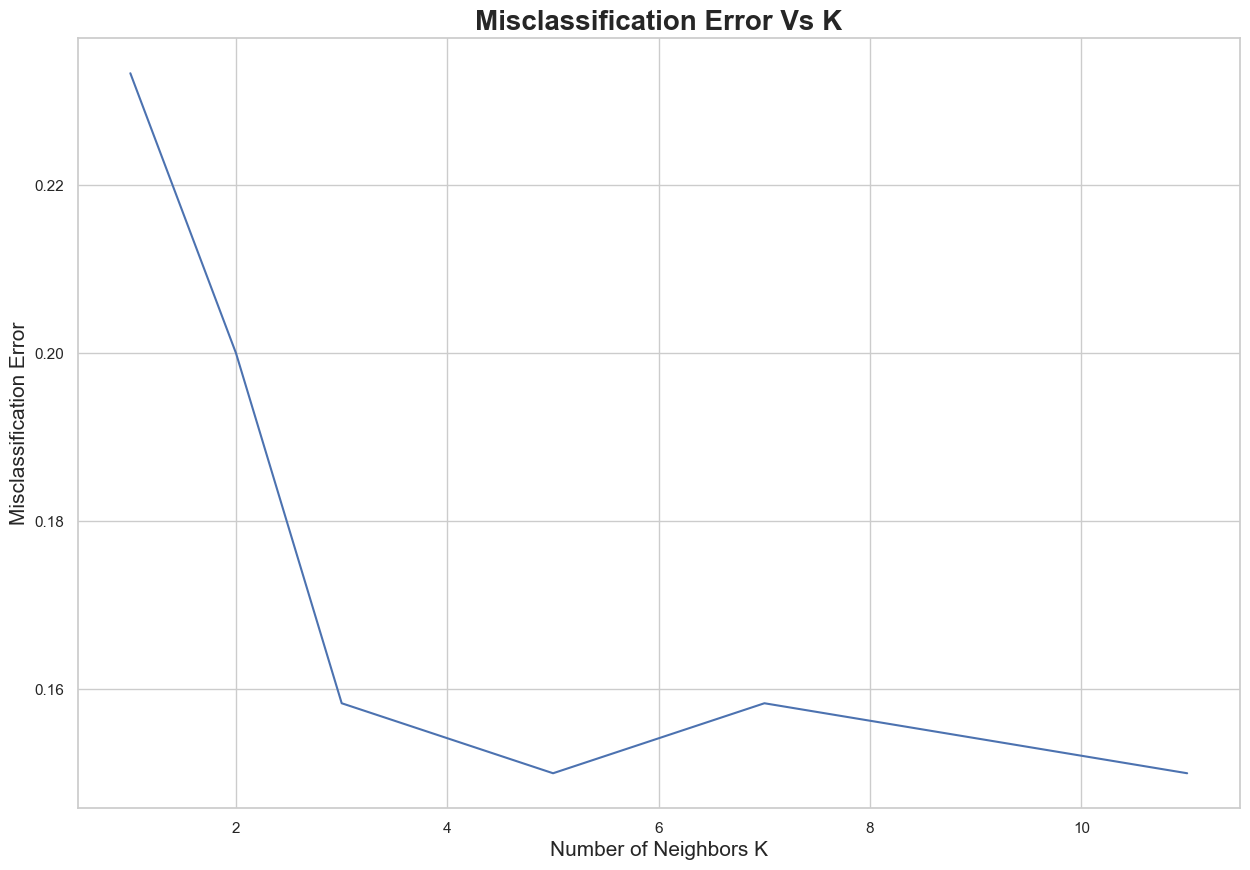

In [12]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Misclassification Error Vs K', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, MSE)

plt.show()

In [13]:
# finding best k
best_k = k_values[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.


##### According to the given k values, the optimal number of neighbors is 5 because the accuracy is high and mean squared error is minimum at the same time. Also, the cross-validation techniques is used to generalize the KNN model 

# Naive Bayes Classifier

## Question
Suppose we have documents below as our training set. 

    d1: Chinese Beijing Chinese , class = C
    d2: Chinese Chinese Shanghai, class = C
    d3: Chinese Macao           , class = C
    d4: Tokyo Japan Chinese     , class = J


Train a NB classifier and predict if `d5` and `d6` belongs to class C or J.

    d5: Chinese Chinese Tokyo Japan, class = ?
    
    d6: Chinese Chinese Chinese Tokyo Japan, class = ?


### Method 1 : Using Naive Bayes model (from sklearn.naive_bayes import MultinomialNB)

In [14]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# create the training dataframe
train_df = pd.DataFrame({
    'document': ['Chinese Beijing Chinese', 'Chinese Chinese Shanghai', 'Chinese Macao', 'Tokyo Japan Chinese'],
    'class': ['C', 'C', 'C', 'J']
})

# create the test dataframe
test_df = pd.DataFrame({
    'document': ['Chinese Chinese Tokyo Japan', 'Chinese Chinese Chinese Tokyo Japan'],
    'class': ['?', '?']
})

# vectorize the documents using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['document'])
X_test = vectorizer.transform(test_df['document'])

# fit the Naive Bayes model
clf = MultinomialNB()
y_train = train_df['class']
clf.fit(X_train, y_train)

# predict the class of the test documents
y_test_pred = clf.predict(X_test)
test_df['class'] = y_test_pred

# print the predicted classes
print(test_df)



                              document class
0          Chinese Chinese Tokyo Japan     C
1  Chinese Chinese Chinese Tokyo Japan     C


### Method 2 : Using conditional probability and marginal probability

In [15]:
def conditional_prob(df, feature, c, val):
    # c is the class (C or J)
    df2 = df[df['class'] == c][feature]
    vals_counts = [[val, (df2 == val).sum() + 1e-8] for val in set(df[feature])]
    total_count = sum([count for val, count in vals_counts])
    
    vals_probs = [(val, count/total_count) for val, count in vals_counts]
    return dict(vals_probs)

def marginal_prob(df, column, c=None, val=None):
    '''
    Compute the marignal probability for values in a column, with optional filtering by class and value
    '''
    if c is not None and val is not None:
        # an array contain pairs of (value, count)
        vals_counts = [(val, ((df[column] == val) & (df['class'] == c)).sum())]
        total_count = (df['class'] == c).sum()
    else:
        # an array contain pairs of (value, count)
        vals_counts = [(val, (df[column] == val).sum()) for val in set(df[column])]
        total_count = len(df)
    
    # an array contain pairs of (value, probability)
    vals_probs = [(val, count/total_count) for val, count in vals_counts]
    # a dictionary in which keys are val and values are the corresponding probabilities
    return dict(vals_probs)


In [16]:
# Compute the conditional probabilities for each feature and class
def calculate_conditional_probs(prior_probs,features,train_df):
    conditional_probs = {}
    for c in prior_probs:
        for feature in features:
            for val in set(train_df[feature]):
                key = f"{feature}={val}|{c}"
                conditional_probs[key] = conditional_prob(train_df, feature, c, val)
    #print(conditional_probs)
    return conditional_probs

def predict_class(prior_probs,features,conditional_probs,train_df):
    posterior_probs = {}
    for c in prior_probs:
        posterior_probs[c] = prior_probs[c]
        for feature in features:
            if feature in conditional_probs:
                key = f"{feature}={row[feature]}|{c}"
                posterior_probs[c] *= conditional_probs[key]
            else:
                # if conditional probability not available, assume uniform distribution
                val_count = len(set(train_df[feature]))
                posterior_probs[c] *= 1/val_count
    # Select the class with the highest probability as the predicted class
    predicted_class = max(posterior_probs, key=posterior_probs.get)
    return predicted_class
            
    

In [17]:
train_df = pd.DataFrame({
    'document': ['Chinese Beijing Chinese', 'Chinese Chinese Shanghai', 'Chinese Macao', 'Tokyo Japan Chinese'],
    'class': ['C', 'C', 'C', 'J']
})

# create the test dataframe
test_df = pd.DataFrame({
    'document': ['Chinese Chinese Tokyo Japan', 'Chinese Chinese Chinese Tokyo Japan'],
    'class': ['?', '?']
})
# Compute the prior probabilities for each class
prior_probs = marginal_prob(train_df, 'class')
print(prior_probs)
features = list(train_df.columns)
features.remove('class')
conditional_probs = calculate_conditional_probs(prior_probs,features,train_df)

# Compute the posterior probabilities for each class
predictions = {}
for i, row in test_df.iterrows():
    predicted_class = predict_class(prior_probs,features,conditional_probs,train_df)
    document_id = row['document']
    predictions[document_id] = predicted_class

print(predictions)

{'C': 0.75, 'J': 0.25}
{'Chinese Chinese Tokyo Japan': 'C', 'Chinese Chinese Chinese Tokyo Japan': 'C'}


#### predicted values: {'Chinese Chinese Tokyo Japan': 'C', 'Chinese Chinese Chinese Tokyo Japan': 'C'}

In [18]:
data = {
'Beijing' :   [1 , 0 , 0 , 0],
'Chinese' :   [2 , 2 , 1 , 1],
'Japan'   :   [0 , 0 , 0 , 1],
'Macao'   :   [0 , 0 , 1 , 0],
'Shanghai':   [0 , 1 , 0 , 0],
'Tokyo'   :   [0 , 0 , 0 , 1],
'class'   :   ['C', 'C', 'C', 'J']
}

df = pd.DataFrame(data)
df.head()

,Beijing,Chinese,Japan,Macao,Shanghai,Tokyo,class
0,1,2,0,0,0,0,C
1,0,2,0,0,1,0,C
2,0,1,0,1,0,0,C
3,0,1,1,0,0,1,J


In [19]:
test_df = pd.DataFrame({
    'Beijing' :   [0 , 0],
    'Chinese' :   [2 , 3],
    'Japan'   :   [1 , 1],
    'Macao'   :   [0 , 0],
    'Shanghai':   [0 , 0],
    'Tokyo'   :   [1 , 1],
    'class'   : ['?', '?']
})

In [20]:
# Compute the prior probabilities for each class
prior_probs = marginal_prob(df, 'class')
print(prior_probs)
features = list(df.columns)
features.remove('class')
conditional_probs = calculate_conditional_probs(prior_probs,features,df)

# Compute the posterior probabilities for each class
predictions = []
for i, row in test_df.iterrows():
    predicted_class = predict_class(prior_probs,features,conditional_probs,df)
    predictions.append(predicted_class) 

print(predictions)

{'C': 0.75, 'J': 0.25}
['C', 'C']
